In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re 
%matplotlib inline

import sys, os
sys.path.append(os.path.dirname(os.path.abspath('')))
sys.path.append(os.path.join(os.path.abspath(''),'..','scripts'))
sys.path.append(os.path.join(os.path.abspath(''),'..','src'))

from Experiment import *
from Analyzer import *
from Artist import *
artist = Artist()

In [12]:
results = Analyzer("blogs").df

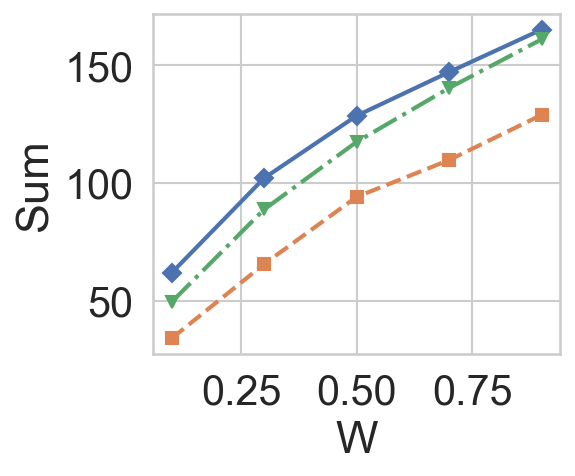

In [13]:
df = results
res = pd.DataFrame()
df['seeds'] = df['cmd'].apply(lambda x: int(re.match(r".* -s ([0-9]+) .*", x).group(1)))

all_params = ["weight_scale"]
defaults = {
    "seeds": 30,
    "weight_scale": 0.1
}

def fix_other_params(variable, df, defaults):
    for p in defaults:
        if p == variable:
            continue
        df = df[df[p] == defaults[p]]
    return df

param_names = {"seeds": "Seeds", "weight_scale": "W"}
for param in all_params:
    for p in df[param].unique():
        dd = df[df[param] == p]
        dd = fix_other_params(param, dd, defaults)

        emf = dd[dd['mode'] == 5]
        emf_seq = np.amin([emf.loc[i,'sequence'] for i in emf.index],axis=0)
        res = res.append({"Active nodes": sum(emf_seq)/dd.iloc[0]['n'], param: p, "Solver": "SEMR"}, ignore_index=True)

        emf = dd[dd['mode'] == 0]
        emf_seq = np.amin([emf.loc[i,'sequence'] for i in emf.index],axis=0)
        res = res.append({"Active nodes": sum(emf_seq)/dd.iloc[0]['n'], param: p, "Solver": "SRNI"}, ignore_index=True)

        emf = dd[dd['mode'].isna()]
        for i in emf.index:
            res = res.append({"Active nodes": sum(emf.loc[i,'sequence'])/dd.iloc[0]['n'], param: p, "Solver": "SRIM"}, ignore_index=True)
            
    #plot
#     sns.set(style="whitegrid", font_scale=1.4, rc={'axes.grid': True})
#     fig = plt.figure(figsize=(4,3), dpi=120)
#     ax = fig.add_subplot(1, 1, 1)
    
    fig = plt.figure(figsize=(3.5, 3), dpi=150)
    sns.set(style="whitegrid", font_scale=1.8, rc={'axes.grid': True})
    ax = fig.add_subplot(1, 1, 1)

    res = pd.DataFrame(res)
    res = res.sort_values(param)
    i = 0
    for s in res.groupby('Solver'):
        plt.plot(s[1][param],s[1]['Active nodes'],label=s[0],linestyle=artist.LINE_STYLES[i],marker=artist.markers[i],linewidth=2)
        i += 1
#     plt.legend()
    ax.set_xlabel(param_names[param])
    ax.set_ylabel("Sum")
    plt.show()

In [14]:
results = Analyzer("blogs_seeds").df

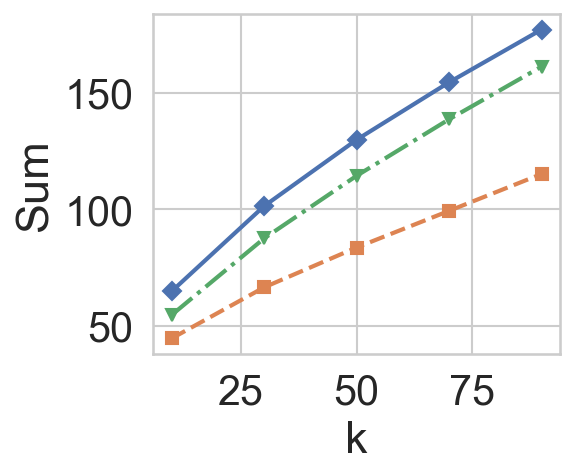

In [21]:
df = results
res = pd.DataFrame()
df['seeds'] = df['cmd'].apply(lambda x: int(re.match(r".* -s ([0-9]+) .*", x).group(1)))

all_params = ["seeds"]
defaults = {
    "seeds": 30,
    "weight_scale": 0.3
}

def fix_other_params(variable, df, defaults):
    for p in defaults:
        if p == variable:
            continue
        df = df[df[p] == defaults[p]]
    return df

param_names = {"seeds": "Seeds", "weight_scale": "W"}
for param in all_params:
    for p in df[param].unique():
        dd = df[df[param] == p]
        dd = fix_other_params(param, dd, defaults)

        emf = dd[dd['mode'] == 5]
        emf_seq = np.amin([emf.loc[i,'sequence'] for i in emf.index],axis=0)
        res = res.append({"Active nodes": sum(emf_seq)/dd.iloc[0]['n'], param: p, "Solver": "SEMR"}, ignore_index=True)

        emf = dd[dd['mode'] == 0]
        emf_seq = np.amin([emf.loc[i,'sequence'] for i in emf.index],axis=0)
        res = res.append({"Active nodes": sum(emf_seq)/dd.iloc[0]['n'], param: p, "Solver": "SRNI"}, ignore_index=True)

        emf = dd[dd['mode'].isna()]
        for i in emf.index:
            res = res.append({"Active nodes": sum(emf.loc[i,'sequence'])/dd.iloc[0]['n'], param: p, "Solver": "SRIM"}, ignore_index=True)
            
    #plot
#     sns.set(style="whitegrid", font_scale=1.4, rc={'axes.grid': True})
#     fig = plt.figure(figsize=(4,3), dpi=120)
#     ax = fig.add_subplot(1, 1, 1)
    fig = plt.figure(figsize=(3.5, 3), dpi=150)
    sns.set(style="whitegrid", font_scale=1.8, rc={'axes.grid': True})
    ax = fig.add_subplot(1, 1, 1)

    res = pd.DataFrame(res)
    res = res.sort_values(param)
    i = 0
    for s in res.groupby('Solver'):
        plt.plot(s[1][param],s[1]['Active nodes'],label=s[0],linestyle=artist.LINE_STYLES[i],marker=artist.markers[i],linewidth=2)
        i += 1
#     plt.legend()
    ax.set_xlabel("k")
    ax.set_ylabel("Sum")
    plt.show()

Text(0, 0.5, '$\\mathcal{I}$')

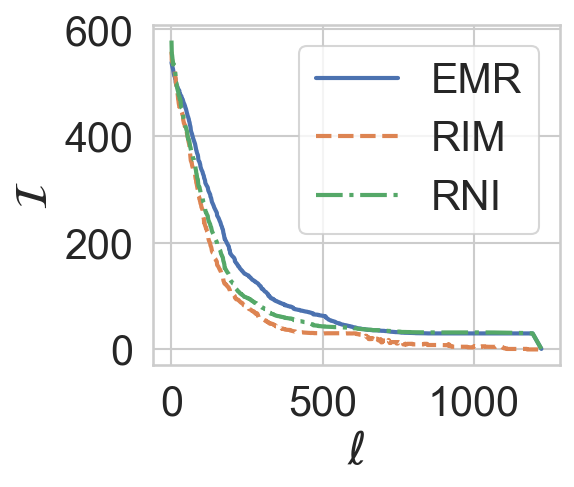

In [19]:
names = {"satgreedy": "SatGreedy", "all_greedy": "AllGreedy", "single_greedy": "SingleGreedy", "single_greedy_celf": "SingleGreedy CELF"}
# sns.set(style="whitegrid", font_scale=1.4, rc={'axes.grid': True})
# fig = plt.figure(figsize=(4,3), dpi=120)
# ax = fig.add_subplot(1, 1, 1)
fig = plt.figure(figsize=(3.5, 3), dpi=150)
sns.set(style="whitegrid", font_scale=1.8, rc={'axes.grid': True})
ax = fig.add_subplot(1, 1, 1)

df = results
df = df[df['seeds'] == 30]
emf = df[df['mode'] == 5]
emf_seq = np.amin([emf.loc[i,'sequence'] for i in emf.index],axis=0)
ax.plot(emf_seq, label="EMR", linestyle=artist.LINE_STYLES[0],linewidth=2)


others = df[df['solver_params'].isna()]
j = 0
for i in others.index:
    ax.plot(np.array(df.loc[i,"sequence"]), label= "RIM".format(names[df.loc[i,"solver"]]), linestyle=artist.LINE_STYLES[1],linewidth=2)
    j+=1

rni = df[df['mode'] == 0]
rni_seq = np.amin([rni.loc[i,'sequence'] for i in rni.index],axis=0)
ax.plot(rni_seq, label="RNI", linestyle=artist.LINE_STYLES[2],linewidth=2)

#     if j == 2:
#         break #two redundant results

# plt.xlim((0,1500))
# plt.ylim((0,800))
ax.legend()
plt.xlabel("$\ell$")
plt.ylabel(r'$\mathcal{I}$')

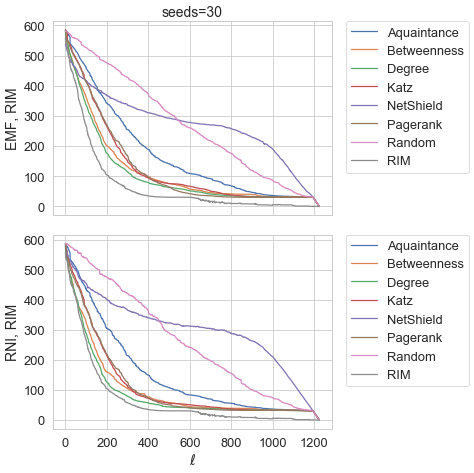

In [16]:
# plot lines 
sns.set(style="whitegrid", font_scale=1.4, rc={'axes.grid': True})
# results = results.sort_values("solver")
for param in all_params:
    for p in df[param].unique():
        fig, axs = plt.subplots(2, 1, sharex=True, dpi=60, figsize=(6,9))
        fig.subplots_adjust(hspace=0.1)
        dd = df[df[param] == p]
        dd = fix_other_params(param, dd, defaults)
        dd = dd.sort_values("solver")

        emf = dd[dd['mode'] == 5]
        for adv_ind in emf['solver'].index:
            axs[0].plot(emf.loc[adv_ind,'sequence'],label=emf.loc[adv_ind,'solver'])
            
            
        emf = dd[dd['mode'] == 0]
        for adv_ind in emf['solver'].index:
            axs[1].plot(emf.loc[adv_ind,'sequence'],label=emf.loc[adv_ind,'solver'])
            
        emf = dd[dd['mode'].isna()]
        for i in emf['solver'].index:
            axs[1].plot(np.array(emf.loc[i,'sequence']),label="RIM")
            axs[0].plot(np.array(emf.loc[i,'sequence']),label="RIM")
            
        axs[0].set_title("{}={}".format(param,p))
        axs[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        axs[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#         axs[2].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        axs[0].set_ylabel("EMF, RIM")
        axs[1].set_ylabel("RNI, RIM")
        axs[1].set_xlabel("$\ell$")
        plt.show()

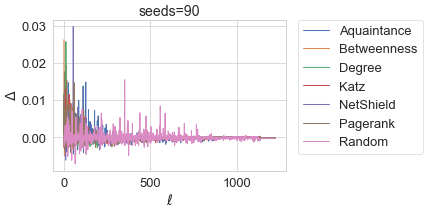

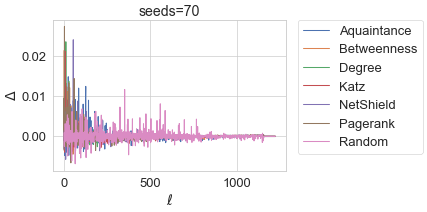

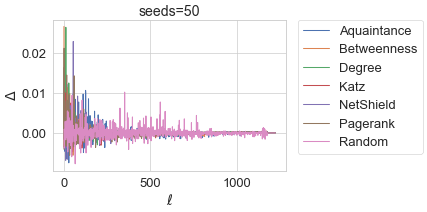

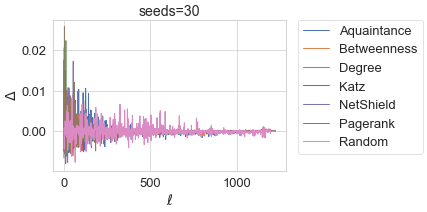

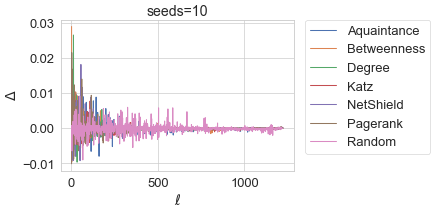

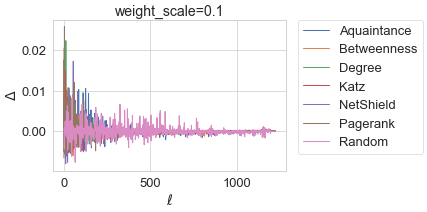

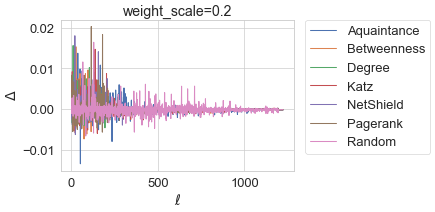

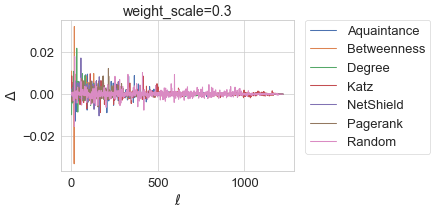

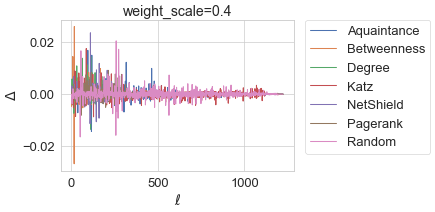

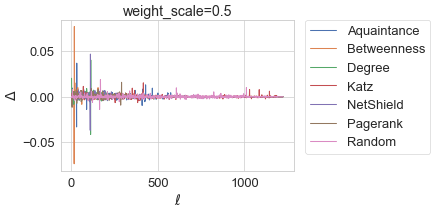

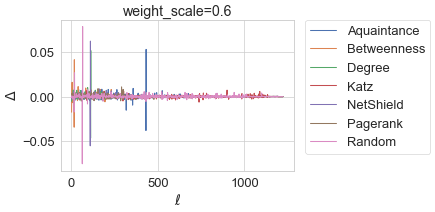

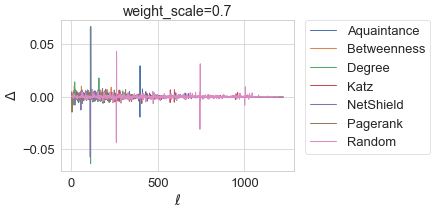

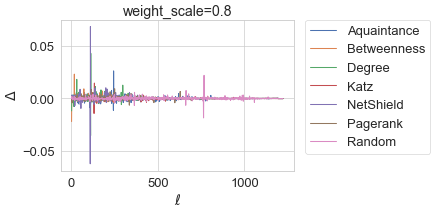

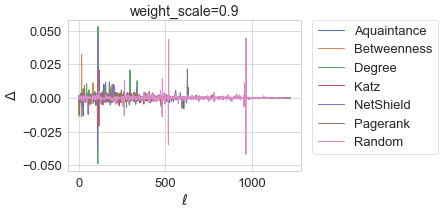

In [20]:
sns.set(style="whitegrid", font_scale=1.7, rc={'axes.grid': True})

def moving_average(signal, period):
    buffer = [np.nan] * period
    for i in range(period,len(signal)):
        buffer.append(signal[i-period:i].mean())
    return buffer

df = df.sort_values("weight_scale")

for param in all_params:
    for p in df[param].unique():
        fig = plt.figure(figsize=(6,4), dpi=50)
        ax = fig.add_subplot(1, 1, 1)
        dd = df[df[param] == p]
        dd = fix_other_params(param, dd, defaults)
        dd = dd.sort_values("solver")
        dd = dd[dd['mode'].notna()]
        for s in dd['solver'].unique():
            emf = dd[dd['solver'] == s]
            s1 = np.array(emf[emf['mode'] == 5].iloc[0]['sequence'])
            s2 = np.array(emf[emf['mode'] == 0].iloc[0]['sequence'])
            #
            s3 = moving_average(np.diff(s1/s1[0]) - np.diff(s2/s2[0]),1)
            ax.plot(s3, label="{}".format(s))
#     ax.set_title("Difference of relative decrease between EMF and RNI")
        ax.set_ylabel("$\Delta$")
        ax.set_xlabel("$\ell$")
        ax.set_title("{}={}".format(param, p))
        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()

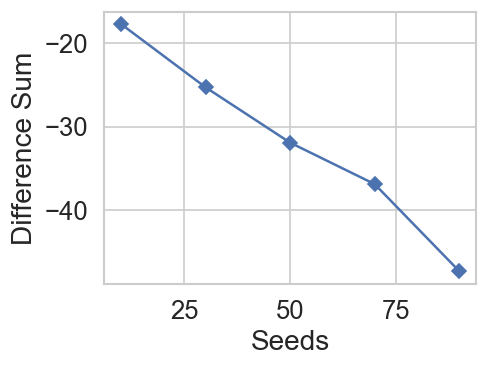

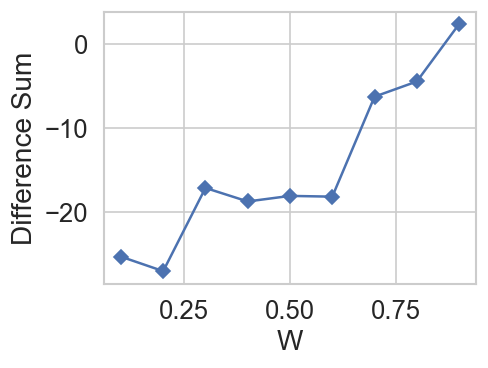

In [21]:
param_names = {"seeds": "Seeds", "weight_scale": "W"}
res = []
for param in all_params:
    res = pd.DataFrame()
    for p in df[param].unique():
        dd = df[df[param] == p]
        dd = fix_other_params(param, dd, defaults)

        emf = dd[dd['mode'] == 5]
        s1 = np.amin([emf.loc[i,'sequence'] for i in emf.index],axis=0)

        emf = dd[dd['mode'] == 0]
        s2 = np.amin([emf.loc[i,'sequence'] for i in emf.index],axis=0)
        
        s3 = (-s1+s1[0])/s1[0] - (-s2+s2[0])/s2[0]
        res = res.append({"Active nodes": sum(s3), param: p, "Solver": "SRNI"}, ignore_index=True)
            
    #plot
    sns.set(style="whitegrid", font_scale=1.4, rc={'axes.grid': True})
    fig = plt.figure(figsize=(4,3), dpi=120)
    ax = fig.add_subplot(1, 1, 1)

    res = res.sort_values(param)
    i = 0
    for s in res.groupby('Solver'):
        plt.plot(s[1][param],s[1]['Active nodes'],label=s[0],linestyle=artist.LINE_STYLES[i],marker=artist.markers[i])
        i += 1
#     plt.legend()
    ax.set_xlabel(param_names[param])
    ax.set_ylabel("Difference Sum")
    plt.show()